<a href="https://colab.research.google.com/github/cml096/GoogleColabRepo/blob/master/Project_Cap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos las librerias

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cleaning and Analysis

Creamos nuestro dataset de trabajo

In [11]:
df = pd.read_excel('Rendimiento CMP V2.xlsx', sheet_name='MinaMLC')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3138 entries, 0 to 3137
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Dia                                       3138 non-null   datetime64[ns]
 1   Turno                                     3138 non-null   int64         
 2   Equipo                                    3138 non-null   int64         
 3   Cargas (u)                                3138 non-null   int64         
 4   Movimiento (t)                            3138 non-null   float64       
 5   tefe (seg)                                3138 non-null   int64         
 6   tdem (seg)                                3138 non-null   int64         
 7   R-ef (t/h)                                3138 non-null   float64       
 8   Número de personal                        3138 non-null   int64         
 9   División de personal          

In [12]:
df.head()

,Dia,Turno,Equipo,Cargas (u),Movimiento (t),tefe (seg),tdem (seg),R-ef (t/h),Número de personal,División de personal,Cod. División,Subdivisión de personal,Cod. Subdivisión,Grupo de personal,Unidad organizativa,Cod. Unidad,Posición,Cod. Posición,Fecha de nacimiento,Edad del empleado,Fecha de alta,Status empleado para Gestión tiempos per
0,2019-07-01,2,211,93,21134.20117,21517,814,3535.954093,20002787,CMP VALLE DEL HUASCO,4100,MINA LOS COLORA,4103,CL:Rol General,MANTENIMIENTO MINA,1030374,ELECTRICO III,2036247,1991-04-08,29,2011-10-01,"1 - Evaluación de tiempos, real"
1,2019-07-01,2,213,12,2833.59961,5593,367,1823.879599,20000875,CMP VALLE DEL HUASCO,4100,MINA LOS COLORA,4103,CL:Rol General,MANTENIMIENTO MINA,1030374,MECANICO I,2032870,1966-01-24,54,1997-03-19,"1 - Evaluación de tiempos, real"
2,2019-07-01,2,305,55,12765.09912,30875,3972,1488.400221,20002365,CMP VALLE DEL HUASCO,4100,PLANTA PELLETS,4102,CL:PDP,SERVICIO SOCIAL HUASCO,1010417,ASISTENTE SOCIAL PLANTA PELLETS,2040856,1979-06-18,41,2008-11-01,"9 - Evaluación de tiempos, teórico"
3,2019-07-01,2,306,53,11911.29931,24996,6950,1715.501581,20006805,CMP VALLE DEL HUASCO,4100,PLANTA PELLETS,4102,CL:Rol General,CONCENTRACION L3,1032819,MECANICO OP. B,2043273,1977-01-04,43,2019-04-15,"1 - Evaluación de tiempos, real"
4,2019-07-01,2,307,100,23335.70117,35320,2801,2378.497288,20001014,CMP VALLE DEL HUASCO,4100,MINA LOS COLORA,4103,CL:Rol General,ADMINISTRACION SUPTCIA PLANTAS,1030376,OPERADOR ELECTRICO II PLANTA,2042636,1957-12-13,62,1998-03-31,"1 - Evaluación de tiempos, real"


Diccionario

In [13]:
diccionario = pd.read_excel('Rendimiento CMP V2.xlsx', sheet_name='Diccionario')
diccionario

,Columna,Detalle
0,Dia,Refiere al día que se registro la actividad.
1,Turno,Son los 2 turnos que presentan en la faena que...
2,Equipo,Refiere al número de la maquina que utilizan.
3,Cargas (u),Cantidad de baldadas del equipo de maquinaria...
4,Movimiento (t),Cantidad de toneladas movidas en el turno.
5,tefe (seg),Tiempo efectivo en segundos.
6,tdem (seg),Tiempo de demora en segundos.
7,R-ef (t/h),Toneladas efectivas movidas en horas.
8,Número de personal,Código único del trabajador.
9,División de personal,Referencia en que sector valle pertenece el tr...


Dividimos Los procesos por zonas

In [14]:
proceso_valle_huasco = {
    'Mina' : ['Carguio Y transporte','Planificacion CP','Mantenimiento mina'],
    'Planta MLC' : ['Chancado','Concentracion Magnetica','Acopio','Mantenimiento Planta'],
    'Transporte' : ['Carga','Cargui'],
    'Planta Pellets' : ['Molienda','Concentracion Magnetica','Filtrado','Balling','Endurecimiento Termino','Mantenimiento PP'],
    'Embarque' : ['Recepcion','Embarque','Mantenimiento PP']
}
proceso_valle_elqui = {
    'Mina' : ['Carguio y transporte','Mantenimiento mina','Planificacion'],
    'Planta' : ['Chancado','Molienda','Concentracion Magnetica','Filtrado','Mantenimiento Planta'],
    'Transporte' : ['Receptor Y Acopio','Carguio','Transporte','Descarga','Mantenimiento Transporte'],
    'Embarque' : ['Recepcion y apilamiento','Embarque','Mantenimiento Puerto']
}
proceso_de_copiapo = {
    'Mina' : ['Carguio Y transporte','Planificacion CP'],
    'Planta CNN' : ['Chancado','Molienda','Concentracion Magnetica','Mantenimiento Planta CNN'],
    'Planta Magnetica' : ['Molienda','Concentracion Magnetica','Mantenimiento Planta Magnetica'],
    'Transporte Fluido' : ['Transporte Fluido CNN','Relave','Mantenimiento PM','Integridad de Ducto'],
    'Filtrado' : ['Filtrado'],
    'Embarque' : ['Recepcion Y Apilamiento']
}

## Group by personal division

In [15]:
df_ = df.drop(['Turno','Equipo','Número de personal','Cod. División','Cod. Subdivisión','Cod. Unidad','Cod. Posición'], axis=1)
df_.groupby(['División de personal']).mean()

,Cargas (u),Movimiento (t),tefe (seg),tdem (seg),R-ef (t/h),Edad del empleado
División de personal,,,,,,
CMP VALLE DEL ELQUI,85.157895,20281.783642,20860.894737,3158.947368,3317.438128,38.000000
CMP VALLE DEL HUASCO,63.912151,14803.913929,22340.605322,2029.430266,2325.294890,45.271241


## Group by personal subdivision

Tomaremos división CMP VALLE DEL HUASCO

In [16]:
df_ = df.drop(['Turno','Equipo','Número de personal','Cod. División','Cod. Subdivisión','Cod. Unidad','Cod. Posición'], axis=1)
df_.groupby(['Subdivisión de personal']).mean()

,Cargas (u),Movimiento (t),tefe (seg),tdem (seg),R-ef (t/h),Edad del empleado
Subdivisión de personal,,,,,,
MINA LOS COLORA,65.164384,15089.483905,21772.320548,1919.663014,2422.582727,45.528219
MINA ROMERAL,85.157895,20281.783642,20860.894737,3158.947368,3317.438128,38.000000
OFICINA GENERAL,83.733333,19609.497013,22522.893333,2413.280000,3162.434302,38.746667
PLANTA PELLETS,60.817884,14080.711356,23180.185398,2170.149303,2128.136762,45.287941


## Personal division MINA LOS COLORA
 

filtro MINA LOS COLORADOS

In [17]:
df_test_minera_colorado = df[df['Subdivisión de personal'] == 'MINA LOS COLORA']

filtro CMP VALLE DEL HUASCO

In [18]:
df_test_minera_colorado = df_test_minera_colorado[df_test_minera_colorado['División de personal'] == 'CMP VALLE DEL HUASCO']

In [19]:
df_ = df_test_minera_colorado
filtro = ['Turno','Equipo','Número de personal','Cod. División','Cod. Subdivisión','Cod. Unidad','Cod. Posición']
df_.drop(filtro, axis=1).describe()

,Cargas (u),Movimiento (t),tefe (seg),tdem (seg),R-ef (t/h),Edad del empleado
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,65.164384,15089.483905,21772.320548,1919.663014,2422.582727,45.528219
std,41.631863,9665.474818,10993.633877,2041.227485,813.882872,11.608631
min,1.000000,216.899990,137.000000,0.000000,279.603580,26.000000
25%,31.000000,7210.500120,12797.000000,472.000000,1808.232502,34.000000
50%,61.000000,14138.999020,22504.000000,1341.000000,2355.800564,48.000000
75%,94.000000,21434.798830,31629.000000,2716.000000,3014.188792,57.000000
max,213.000000,50036.500000,42586.000000,18235.000000,6322.608522,64.000000


Analizaremos por personal por Equipo

In [20]:
df_ = df_test_minera_colorado
df_210 = df_[df_['Equipo'] == 210]
equipo_210 = df_210['Número de personal'].count()
df_211 = df_[df_['Equipo'] == 211]
equipo_211 = df_211['Número de personal'].count()
df_212 = df_[df_['Equipo'] == 212]
equipo_212 = df_212['Número de personal'].count()
df_213 = df_[df_['Equipo'] == 213]
equipo_213 = df_213['Número de personal'].count()
df_305 = df_[df_['Equipo'] == 305]
equipo_305 = df_305['Número de personal'].count()
df_306 = df_[df_['Equipo'] == 306]
equipo_306 = df_306['Número de personal'].count()
df_307 = df_[df_['Equipo'] == 307]
equipo_307 = df_307['Número de personal'].count()
print(f'Equpos : Cantidad')
print(f'210 : {equipo_210}')
print(f'211 : {equipo_211}')
print(f'212 : {equipo_212}')
print(f'213 : {equipo_213}')
print(f'305 : {equipo_305}')
print(f'306 : {equipo_306}')
print(f'307 : {equipo_307}')

Equpos : Cantidad
210 : 278
211 : 365
212 : 53
213 : 253
305 : 232
306 : 266
307 : 378


Cantidad de personal por equipo

In [21]:
filtro = ['Turno','Número de personal','Cod. División','Cod. Subdivisión','Cod. Unidad','Cod. Posición']
groupby = df_.drop(filtro, axis=1).groupby(['Equipo']).mean()
groupby

,Cargas (u),Movimiento (t),tefe (seg),tdem (seg),R-ef (t/h),Edad del empleado
Equipo,,,,,,
210,73.248201,17166.864908,21643.866906,1421.863309,2831.360153,39.852518
211,84.506849,19385.251074,23191.167123,2484.276712,2949.534153,39.873973
212,91.792453,21374.928664,20518.584906,2591.075472,3640.441281,43.471698
213,88.438735,20567.788843,22934.857708,1715.359684,3164.869376,41.818182
305,30.780172,7073.821147,17461.331897,1539.353448,1428.569405,47.534483
306,49.124060,11377.678627,20996.413534,1598.804511,1915.676094,49.748120
307,53.621693,12397.333925,23086.335979,2242.383598,1912.333612,53.732804


Analizamos las variables por equipo de trabajo

In [13]:
filtro = ['Turno','Equipo','División de personal','Subdivisión de personal','Número de personal','Cod. División','Cod. Subdivisión','Cod. Unidad','Cod. Posición','Fecha de alta','Fecha de nacimiento','Edad del empleado']
test = df_210.drop(filtro,axis=1)
print('Equipo 210')
test.corr()

Equipo 210


,Cargas (u),Movimiento (t),tefe (seg),tdem (seg),R-ef (t/h)
Cargas (u),1.000000,0.999448,0.946231,0.255472,0.360645
Movimiento (t),0.999448,1.000000,0.943903,0.253156,0.366540
tefe (seg),0.946231,0.943903,1.000000,0.303678,0.090450
tdem (seg),0.255472,0.253156,0.303678,1.000000,-0.054604
R-ef (t/h),0.360645,0.366540,0.090450,-0.054604,1.000000


Tomamos el equipo 210 para ver las correlaciones que se tienen

In [ ]:
sns.pairplot(test)

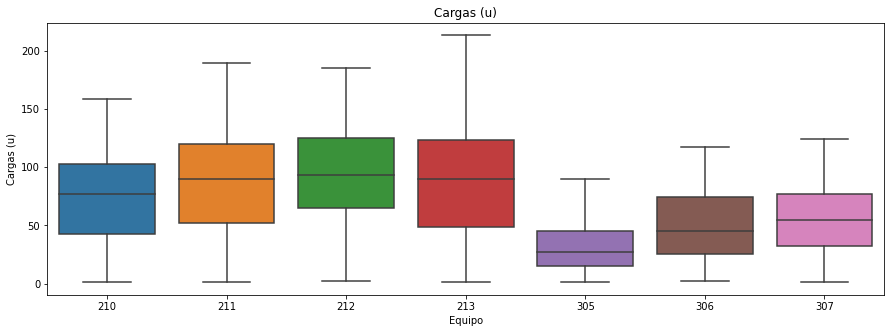

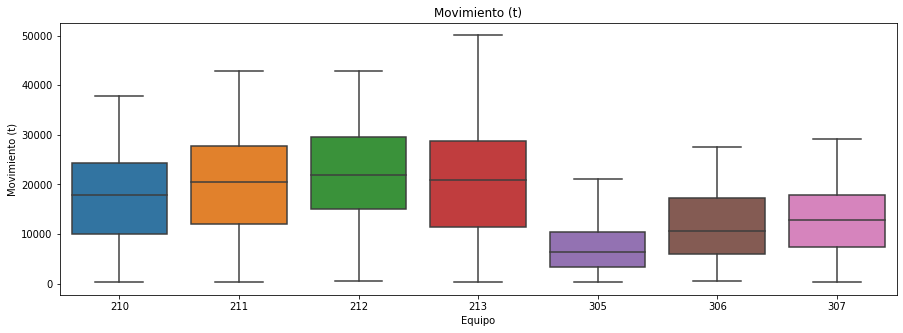

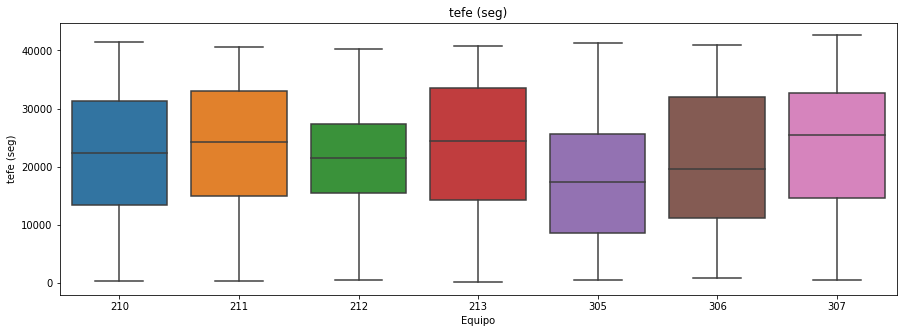

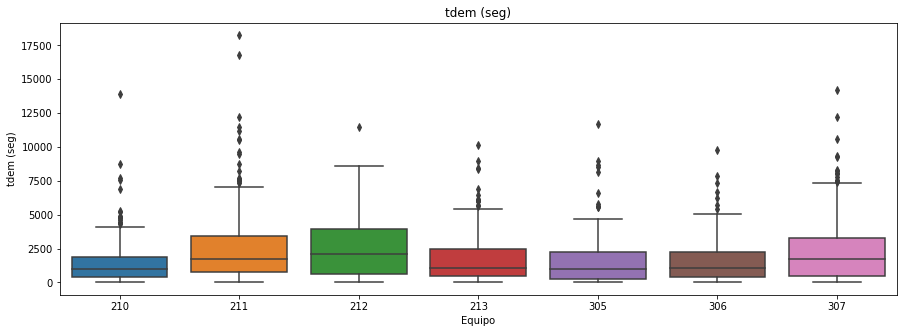

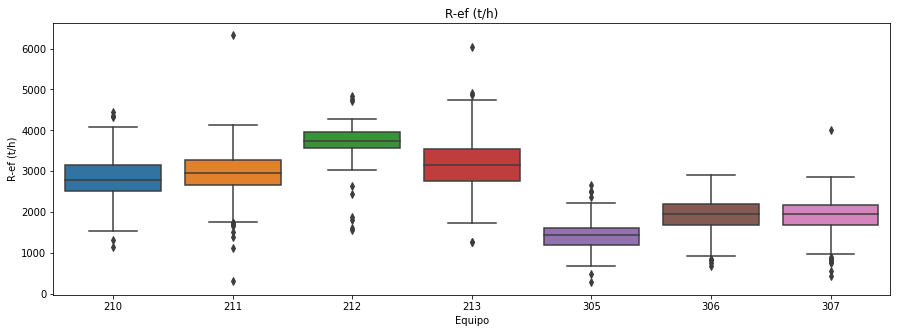

In [15]:
y = ['Cargas (u)','Movimiento (t)','tefe (seg)','tdem (seg)','R-ef (t/h)']
for y_ in y:
  plt.figure(figsize=(15,5))
  sns.boxplot(x='Equipo',y=y_,data=df_test_minera_colorado).set_title(y_)

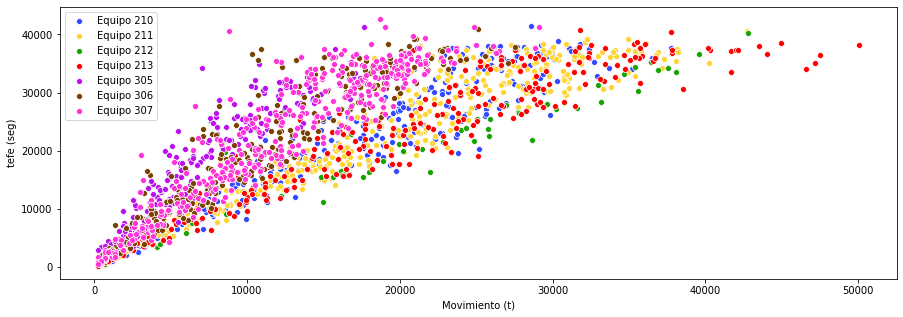

In [23]:
plt.figure(figsize=(15,5))
sns.scatterplot(df_210['Movimiento (t)'], df_210['tefe (seg)'], label='Equipo 210', color='#3349FF')
sns.scatterplot(df_211['Movimiento (t)'], df_211['tefe (seg)'], label='Equipo 211', color='#FFD433')
sns.scatterplot(df_212['Movimiento (t)'], df_212['tefe (seg)'], label='Equipo 212', color='#17A301')
sns.scatterplot(df_213['Movimiento (t)'], df_213['tefe (seg)'], label='Equipo 213', color='#FF0000')
sns.scatterplot(df_305['Movimiento (t)'], df_305['tefe (seg)'], label='Equipo 305', color='#BC10EF')
sns.scatterplot(df_306['Movimiento (t)'], df_306['tefe (seg)'], label='Equipo 306', color='#784100')
sns.scatterplot(df_307['Movimiento (t)'], df_307['tefe (seg)'], label='Equipo 307', color='#FF33D7')

## Anilizing "turno"

filtos ocupados para la realizacion del análisis
* division CMP VALLE HUASCO
* subdivision MINA LOS COLORADOS

In [25]:
df_turno_1 = df_test_minera_colorado[df_test_minera_colorado['Turno'] == 1]
df_turno_2 = df_test_minera_colorado[df_test_minera_colorado['Turno'] == 2]

In [31]:
filtro = ['Turno','Número de personal','Cod. División','Subdivisión de personal','Cod. Subdivisión','Grupo de personal','Cod. Unidad','Cod. Posición','Fecha de nacimiento','Edad del empleado','Status empleado para Gestión tiempos per']
df_test = df_turno_1.drop(filtro,axis=1)
df_test.head(7)

,Dia,Equipo,Cargas (u),Movimiento (t),tefe (seg),tdem (seg),R-ef (t/h),División de personal,Unidad organizativa,Posición,Fecha de alta
5,2019-07-02,211,148,34061.60938,37283,960,3288.946538,CMP VALLE DEL HUASCO,CAMIONES CAT 793F MLC,OPERADOR III,2013-09-01
6,2019-07-02,213,7,1632.20007,2962,67,1983.767810,CMP VALLE DEL HUASCO,MANTENIMIENTO MINA,MECANICO III,2011-04-01
7,2019-07-02,213,56,13101.79981,15061,225,3131.696389,CMP VALLE DEL HUASCO,ADMINISTRACION SUPTCIA PLANTAS,OPERADOR MECANICO III PLANTA,2013-03-01
8,2019-07-02,305,24,5459.00000,23453,1014,837.948237,CMP VALLE DEL HUASCO,MANTENIMIENTO MINA,ELECTRICO I,1996-12-17
15,2019-07-03,210,16,3648.40015,5075,0,2588.027693,CMP VALLE DEL HUASCO,ADMINISTRACION SUPTCIA PLANTAS,OPERADOR MECANICO III PLANTA,2013-03-01
16,2019-07-03,211,130,31098.30078,30771,1465,3638.291989,CMP VALLE DEL HUASCO,CAMIONES CAT 793F MLC,OPERADOR III,2013-09-01
17,2019-07-03,213,151,35698.10547,31652,414,4060.191447,CMP VALLE DEL HUASCO,ADMINISTRACION SUPTCIA PLANTAS,OPERADOR MECANICO III PLANTA,2013-03-01


In [32]:
filtro = ['Turno','Número de personal','Cod. División','Subdivisión de personal','Cod. Subdivisión','Grupo de personal','Cod. Unidad','Cod. Posición','Fecha de nacimiento','Edad del empleado','Status empleado para Gestión tiempos per']
df_test = df_turno_2.drop(filtro,axis=1)
df_test.head(7)

,Dia,Equipo,Cargas (u),Movimiento (t),tefe (seg),tdem (seg),R-ef (t/h),División de personal,Unidad organizativa,Posición,Fecha de alta
0,2019-07-01,211,93,21134.20117,21517,814,3535.954093,CMP VALLE DEL HUASCO,MANTENIMIENTO MINA,ELECTRICO III,2011-10-01
1,2019-07-01,213,12,2833.59961,5593,367,1823.879599,CMP VALLE DEL HUASCO,MANTENIMIENTO MINA,MECANICO I,1997-03-19
4,2019-07-01,307,100,23335.70117,35320,2801,2378.497288,CMP VALLE DEL HUASCO,ADMINISTRACION SUPTCIA PLANTAS,OPERADOR ELECTRICO II PLANTA,1998-03-31
11,2019-07-02,211,131,30349.59766,35604,1448,3068.715638,CMP VALLE DEL HUASCO,ALJIBES MLC,OPERADOR I,2013-11-01
12,2019-07-02,213,126,29355.80859,35722,1197,2958.426486,CMP VALLE DEL HUASCO,MANTENIMIENTO MINA,MECANICO I,1997-03-19
14,2019-07-02,307,35,8221.89966,15771,321,1876.788966,CMP VALLE DEL HUASCO,ADMINISTRACION SUPTCIA PLANTAS,OPERADOR ELECTRICO II PLANTA,1998-03-31
20,2019-07-03,210,68,15529.60059,21877,441,2555.494909,CMP VALLE DEL HUASCO,MANTENIMIENTO MINA,MECANICO I,1997-03-19


In [29]:
filtro = filtro = ['Turno','Número de personal','Cod. División','Cod. Subdivisión','Cod. Unidad','Cod. Posición']
df_test = df_turno_1.drop(filtro,axis=1)
df_test.groupby(['Dia']).mean().head()

,Equipo,Cargas (u),Movimiento (t),tefe (seg),tdem (seg),R-ef (t/h),Edad del empleado
Dia,,,,,,,
2019-07-02,235.500000,58.750000,13563.652315,19689.750000,566.500000,2310.589743,40.000000
2019-07-03,211.333333,99.000000,23481.602133,22499.333333,626.333333,3428.837043,33.666667
2019-07-04,211.750000,95.500000,22603.222290,25677.000000,1347.250000,3231.287790,33.500000
2019-07-05,243.333333,53.333333,12361.070273,17074.000000,1127.333333,2674.959126,39.333333
2019-07-06,243.000000,110.333333,25353.166020,31608.000000,4740.666667,2902.698556,41.666667


In [28]:
filtro = filtro = ['Turno','Número de personal','Cod. División','Cod. Subdivisión','Cod. Unidad','Cod. Posición']
df_test = df_turno_2.drop(filtro,axis=1)
df_test.groupby(['Dia']).mean().head()

,Equipo,Cargas (u),Movimiento (t),tefe (seg),tdem (seg),R-ef (t/h),Edad del empleado
Dia,,,,,,,
2019-07-01,243.666667,68.333333,15767.833983,20810.000000,1327.333333,2579.443660,48.333333
2019-07-02,243.666667,97.333333,22642.435303,29032.333333,988.666667,2634.643696,50.333333
2019-07-03,235.250000,88.500000,20976.901122,26439.250000,3927.250000,2721.299028,53.000000
2019-07-04,235.250000,72.250000,16984.674340,18059.000000,3434.000000,3088.237107,53.000000
2019-07-05,286.600000,35.400000,8232.560172,16547.000000,2350.800000,1778.006633,54.600000


In [40]:
df_test = df_turno_2[df_turno_2['Dia'] == '2019-07-01']
df_test.drop(filtro,axis=1)

,Dia,Equipo,Cargas (u),Movimiento (t),tefe (seg),tdem (seg),R-ef (t/h),División de personal,Unidad organizativa,Posición,Fecha de alta
0,2019-07-01,211,93,21134.20117,21517,814,3535.954093,CMP VALLE DEL HUASCO,MANTENIMIENTO MINA,ELECTRICO III,2011-10-01
1,2019-07-01,213,12,2833.59961,5593,367,1823.879599,CMP VALLE DEL HUASCO,MANTENIMIENTO MINA,MECANICO I,1997-03-19
4,2019-07-01,307,100,23335.70117,35320,2801,2378.497288,CMP VALLE DEL HUASCO,ADMINISTRACION SUPTCIA PLANTAS,OPERADOR ELECTRICO II PLANTA,1998-03-31


In [41]:
df_test = df_turno_2[df_turno_2['Dia'] == '2019-08-20']
df_test.drop(filtro,axis=1)

,Dia,Equipo,Cargas (u),Movimiento (t),tefe (seg),tdem (seg),R-ef (t/h),División de personal,Unidad organizativa,Posición,Fecha de alta
595,2019-08-20,211,67,15522.30078,15285,1998,3655.890272,CMP VALLE DEL HUASCO,ALJIBES MLC,OPERADOR I,2013-11-01
597,2019-08-20,213,189,44031.10156,36586,307,4332.585295,CMP VALLE DEL HUASCO,MANTENIMIENTO MINA,MECANICO I,1997-03-19
601,2019-08-20,307,55,12774.39868,19921,200,2308.510378,CMP VALLE DEL HUASCO,ADMINISTRACION SUPTCIA PLANTAS,OPERADOR ELECTRICO II PLANTA,1998-03-31


In [42]:
df_test = df_turno_1[df_turno_1['Dia'] == '2019-07-02']
df_test.drop(filtro,axis=1)

,Dia,Equipo,Cargas (u),Movimiento (t),tefe (seg),tdem (seg),R-ef (t/h),División de personal,Unidad organizativa,Posición,Fecha de alta
5,2019-07-02,211,148,34061.60938,37283,960,3288.946538,CMP VALLE DEL HUASCO,CAMIONES CAT 793F MLC,OPERADOR III,2013-09-01
6,2019-07-02,213,7,1632.20007,2962,67,1983.767810,CMP VALLE DEL HUASCO,MANTENIMIENTO MINA,MECANICO III,2011-04-01
7,2019-07-02,213,56,13101.79981,15061,225,3131.696389,CMP VALLE DEL HUASCO,ADMINISTRACION SUPTCIA PLANTAS,OPERADOR MECANICO III PLANTA,2013-03-01
8,2019-07-02,305,24,5459.00000,23453,1014,837.948237,CMP VALLE DEL HUASCO,MANTENIMIENTO MINA,ELECTRICO I,1996-12-17


In [43]:
df_test = df_turno_1[df_turno_1['Dia'] == '2019-08-02']
df_test.drop(filtro,axis=1)

,Dia,Equipo,Cargas (u),Movimiento (t),tefe (seg),tdem (seg),R-ef (t/h),División de personal,Unidad organizativa,Posición,Fecha de alta
382,2019-08-02,212,104,24836.40039,21752,3383,4110.474504,CMP VALLE DEL HUASCO,MANTENIMIENTO MINA,MECANICO III,2011-04-01
383,2019-08-02,212,93,21975.69727,16321,916,4847.283265,CMP VALLE DEL HUASCO,ADMINISTRACION SUPTCIA PLANTAS,OPERADOR MECANICO III PLANTA,2013-03-01
384,2019-08-02,305,77,17687.80078,41242,1186,1543.962049,CMP VALLE DEL HUASCO,MANTENIMIENTO MINA,ELECTRICO I,1996-12-17


## Analizing of variable "Dia"

filtos ocupados para la realizacion del análisis
* division CMP VALLE HUASCO
* subdivision MINA LOS COLORADOS

In [44]:
df_ = df_test_minera_colorado

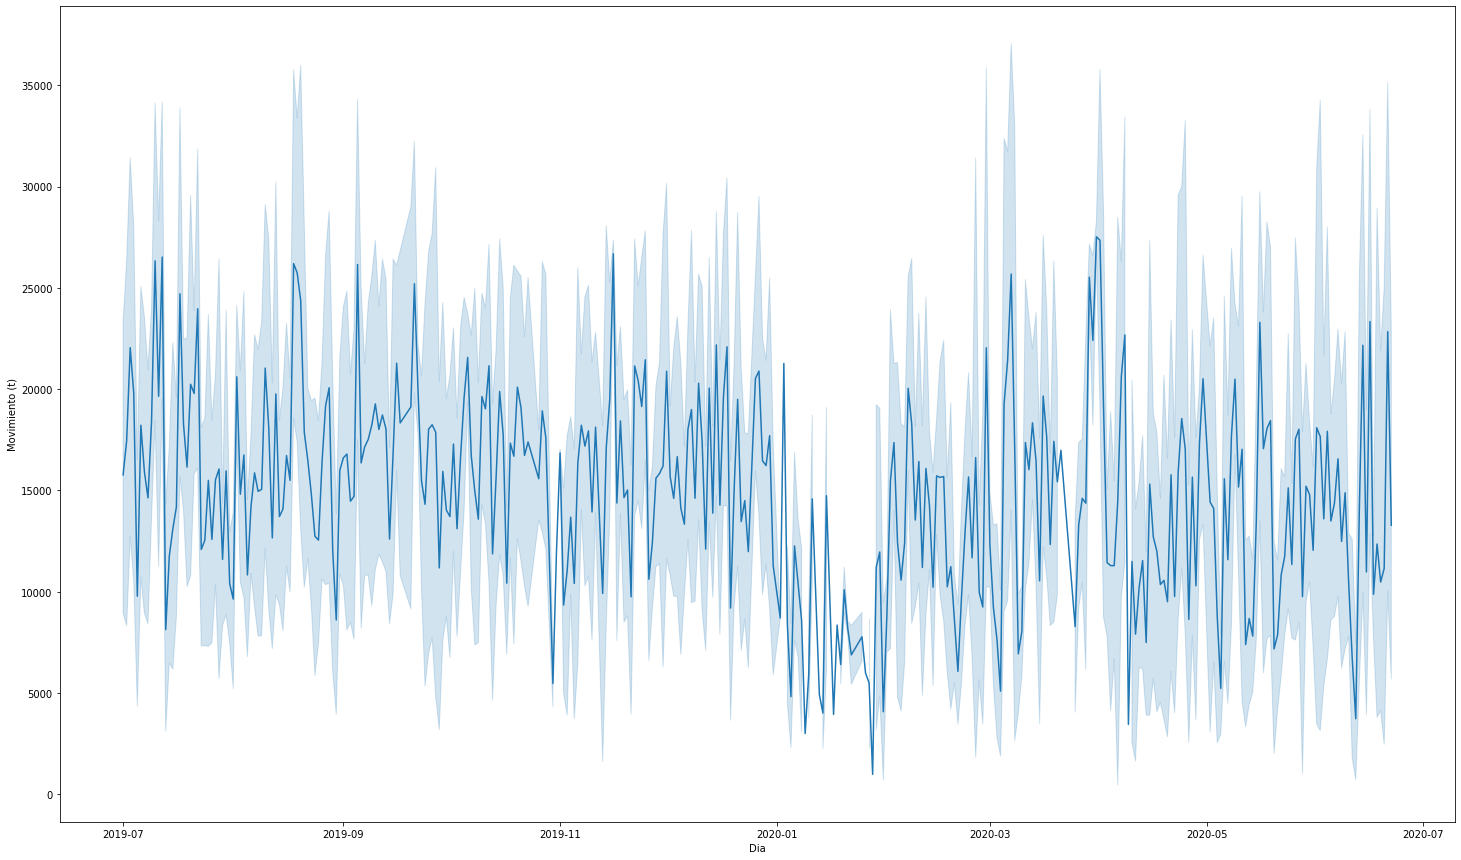

In [50]:
plt.figure(figsize=(25,15))
sns.lineplot(x='Dia',y='Movimiento (t)',data=df_)